## Homework: 05

> Note: sometimes your answer doesn't match one of the options exactly. 
> That's fine. 
> Select the option that's closest to your solution.

> Note: we recommend using python 3.11 in this homework.

## Question 1

* Install Pipenv
* What's the version of pipenv you installed?
* Use `--version` to find out

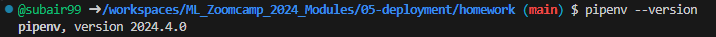

#### Question 01 Answer: `2024.2.0`

## Question 2

* Use Pipenv to install Scikit-Learn version 1.5.2
* What's the first hash for scikit-learn you get in Pipfile.lock?

> **Note**: you should create an empty folder for homework
and do it there. 

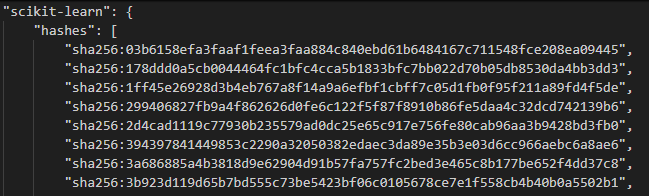

#### Question 02 Answer: `sha256:03b6158efa3faaf1feea3faa884c840ebd61b6484167c711548fce208ea09445`

## Models

We've prepared a dictionary vectorizer and a model.

They were trained (roughly) using this code:

```python
features = ['job', 'duration', 'poutcome']
dicts = df[features].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X = dv.fit_transform(dicts)

model = LogisticRegression().fit(X, y)
```

> **Note**: You don't need to train the model. This code is just for your reference.

And then saved with Pickle. Download them:

* [DictVectorizer](https://github.com/DataTalksClub/machine-learning-zoomcamp/tree/master/cohorts/2024/05-deployment/homework/dv.bin?raw=true)
* [LogisticRegression](https://github.com/DataTalksClub/machine-learning-zoomcamp/tree/master/cohorts/2024/05-deployment/homework/model1.bin?raw=true)

With `wget`:

```bash
PREFIX=https://raw.githubusercontent.com/DataTalksClub/machine-learning-zoomcamp/master/cohorts/2024/05-deployment/homework
wget $PREFIX/model1.bin
wget $PREFIX/dv.bin
```

## Question 3

Let's use these models!

* Write a script for loading these models with pickle
* Score this client:

```json
{"job": "management", "duration": 400, "poutcome": "success"}
```

What's the probability that this client will get a subscription? 

* 0.359
* 0.559
* 0.759
* 0.959

If you're getting errors when unpickling the files, check their checksum:

```bash
$ md5sum model1.bin dv.bin
3d8bb28974e55edefa000fe38fd3ed12  model1.bin
7d37616e00aa80f2152b8b0511fc2dff  dv.bin
```

In [1]:
# Define the data source and download location.
PREFIX = 'https://raw.githubusercontent.com/DataTalksClub/machine-learning-zoomcamp/master/cohorts/2024/05-deployment/homework'
POSTFIX = '../05-deployment/homework'

In [2]:
# Get the model.
!wget -O $POSTFIX/model1.bin $PREFIX/model1.bin

--2024-12-01 00:28:11--  https://raw.githubusercontent.com/DataTalksClub/machine-learning-zoomcamp/master/cohorts/2024/05-deployment/homework/model1.bin
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 850 [application/octet-stream]
Saving to: ‘../05-deployment/homework/model1.bin’

../05-deployment/ho 100%[===================>]     850  --.-KB/s    in 0s      

2024-12-01 00:28:11 (76.9 MB/s) - ‘../05-deployment/homework/model1.bin’ saved [850/850]



In [3]:
# Get the dv.
!wget -O $POSTFIX/dv.bin $PREFIX/dv.bin

--2024-12-01 00:28:13--  https://raw.githubusercontent.com/DataTalksClub/machine-learning-zoomcamp/master/cohorts/2024/05-deployment/homework/dv.bin
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 560 [application/octet-stream]
Saving to: ‘../05-deployment/homework/dv.bin’

../05-deployment/ho 100%[===================>]     560  --.-KB/s    in 0s      

2024-12-01 00:28:13 (28.6 MB/s) - ‘../05-deployment/homework/dv.bin’ saved [560/560]



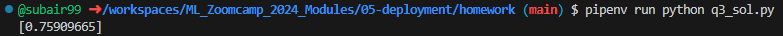

#### Question 03 Answer: `0.759`

## Question 4

Now let's serve this model as a web service

* Install Flask and gunicorn (or waitress, if you're on Windows)
* Write Flask code for serving the model
* Now score this client using `requests`:

```python
url = "YOUR_URL"
client = {"job": "student", "duration": 280, "poutcome": "failure"}
requests.post(url, json=client).json()
```

What's the probability that this client will get a subscription?

* 0.335
* 0.535
* 0.735
* 0.935

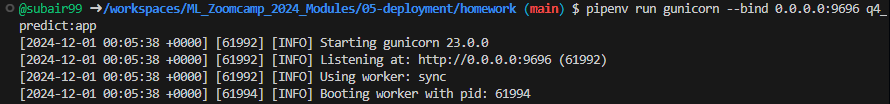

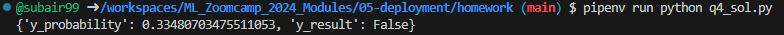

#### Question 04 Answer: `0.335`

## Docker

Install [Docker](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/05-deployment/06-docker.md). 
We will use it for the next two questions.

For these questions, we prepared a base image: `svizor/zoomcamp-model:3.11.5-slim`. 
You'll need to use it (see Question 5 for an example).

This image is based on `python:3.11.5-slim` and has a logistic regression model 
(a different one) as well a dictionary vectorizer inside. 

This is how the Dockerfile for this image looks like:

```docker 
FROM python:3.11.5-slim
WORKDIR /app
COPY ["model2.bin", "dv.bin", "./"]
```

We already built it and then pushed it to [`svizor/zoomcamp-model:3.11.5-slim`](https://hub.docker.com/r/svizor/zoomcamp-model).

> **Note**: You don't need to build this docker image, it's just for your reference.

## Question 5

Download the base image `svizor/zoomcamp-model:3.11.5-slim`. You can easily make it by using [docker pull](https://docs.docker.com/engine/reference/commandline/pull/) command.

So what's the size of this base image?

* 45 MB
* 130 MB
* 245 MB
* 330 MB

You can get this information when running `docker images` - it'll be in the "SIZE" column.

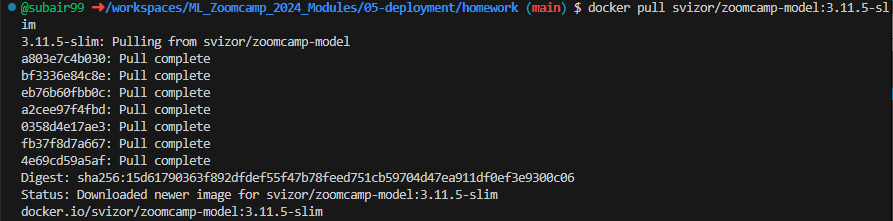

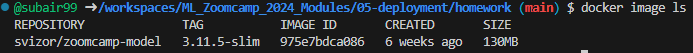

#### Question 05 Answer: `130MB`

## Dockerfile

Now create your own Dockerfile based on the image we prepared.

It should start like that:

```docker
FROM svizor/zoomcamp-model:3.11.5-slim
# add your stuff here
```

Now complete it:

* Install all the dependencies form the Pipenv file
* Copy your Flask script
* Run it with Gunicorn 

After that, you can build your docker image.

The downloaded image has a model and dictvectorizer embeded.

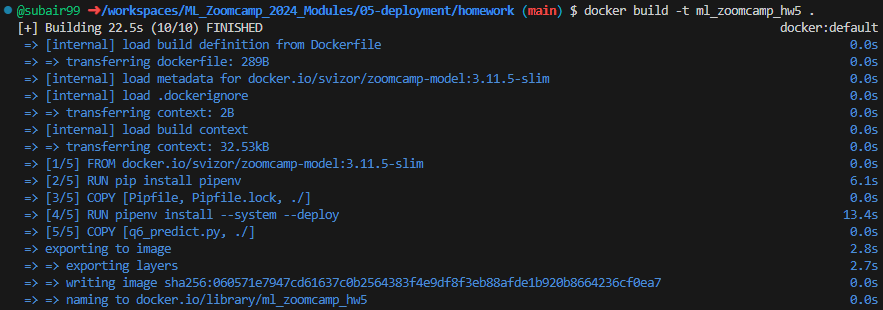

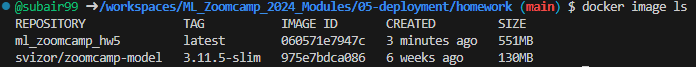

## Question 6

Let's run your docker container!

After running it, score this client once again:

```python
url = "YOUR_URL"
client = {"job": "management", "duration": 400, "poutcome": "success"}
requests.post(url, json=client).json()
```

What's the probability that this client will get a subscription now?

* 0.287
* 0.530
* 0.757
* 0.960

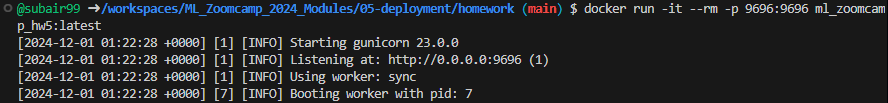

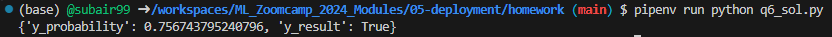

#### Question 06 Answer: `0.757`